In [94]:
import torch
from d2l import torch as d2l

In [95]:
x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [96]:
x.grad

In [97]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [98]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [99]:
x.grad == 4 * x

tensor([True, True, True, True])

In [100]:
x.grad.zero_()

y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [101]:
x.grad.zero_()

y = x * x
y.backward(gradient=torch.ones(len(y)))

x.grad


tensor([0., 2., 4., 6.])

In [102]:
x.grad.zero_()

y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [103]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [104]:
def f(a):
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b
  else:
    c = 100 * b
  return c

In [105]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [106]:
a.grad == d / a

tensor(True)

In [107]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [108]:
x.grad.zero_()

y = x**2

y.sum().backward()

In [109]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2

y.backward(retain_graph=True)
print(f"First grad: {x.grad}")

x.grad.zero_()
y.backward()
print(f"Second grad: {x.grad}")

First grad: 4.0
Second grad: 4.0


In [110]:
def f(a):
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b
  else:
    c = 100 * b
  return c

In [111]:
a = torch.randn(size=(1, 5), requires_grad=True)
d = f(a)

external_grad = torch.ones(1, d.shape[1])
d.backward(gradient=external_grad)

print(f"a: {a}")
print(f"d: {d}")
print(f"da: {a.grad}")

a: tensor([[-1.7225, -1.6256, -0.4791, -0.3648,  1.0384]], requires_grad=True)
d: tensor([[-88192.2578, -83231.4062, -24530.6758, -18676.7402,  53164.3789]],
       grad_fn=<MulBackward0>)
da: tensor([[51200., 51200., 51200., 51200., 51200.]])


In [112]:
def f(x): 
  return torch.sin(x)

In [130]:
x = torch.arange(-10.0, 10.0, 0.01, requires_grad=True)

y = f(x)

external_grad = torch.ones_like(x)
y.backward(gradient=external_grad)

dx = x.grad


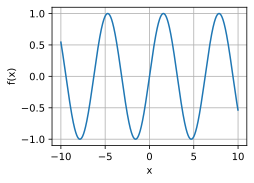

In [129]:
d2l.plot(x.detach().numpy(), y.detach().numpy(), "x", "f(x)")

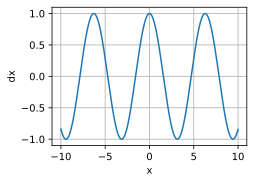

In [131]:
d2l.plot(x.detach().numpy(), dx.detach().numpy(), "x", "dx")